In [1]:
#load the saved matrices
import pickle
train_X=pickle.load(open( "dipep_new_train_x.p", "rb" ) )
test_X=pickle.load(open( "dipep_new_test_x.p", "rb" ) )
train_Y=pickle.load(open( "dipep_new_train_y.p", "rb" ) )
test_Y=pickle.load(open( "dipep_new_test_y.p", "rb" ) )
mean_arr=pickle.load(open( "dipep_new_mean.p", "rb" ) )
mean_std=pickle.load(open( "dipep_new_std.p", "rb" ) )

In [2]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2437132082676575309
]


In [4]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(407, input_dim=407, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 407)               166056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 407)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               81600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [5]:
model.fit(train_X, train_Y, epochs=200, batch_size=400,verbose=0)

In [6]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 182us/step
Accuracy: 79.11%


In [12]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.91      0.79      0.85        95
     Minor capsid       0.78      0.93      0.85        45
        Baseplate       0.72      0.91      0.80       108
       Major tail       0.91      0.67      0.77        43
       Minor tail       0.93      0.93      0.93        44
           Portal       0.92      0.81      0.86        80
       Tail fiber       0.78      0.41      0.53        96
       Tail shaft       0.70      0.72      0.71        39
           Collar       0.39      0.83      0.53        35
Head-Tail joining       0.98      0.98      0.98        90

        micro avg       0.79      0.79      0.79       675
        macro avg       0.80      0.80      0.78       675
     weighted avg       0.82      0.79      0.79       675



In [8]:
#you can save the as a file so you dont have to train it every time
model.save('di_new_model.h5')

In [21]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
zz2=Counter(test_Y_predicted)
sample_w2=[zz2[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 108, 6: 96, 0: 95, 9: 90, 5: 80, 1: 45, 4: 44, 3: 43, 7: 39, 8: 35})
[95, 45, 108, 43, 44, 80, 96, 39, 35, 90]



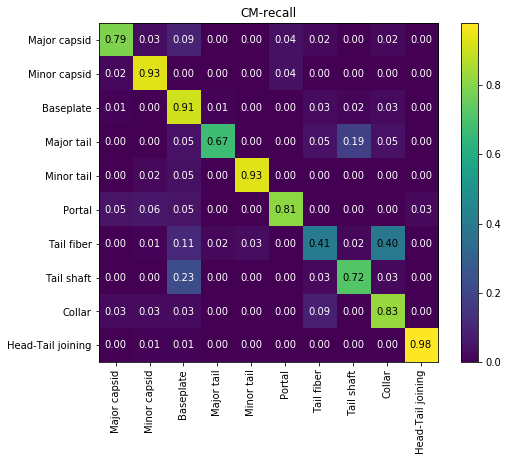

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM-recall')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")

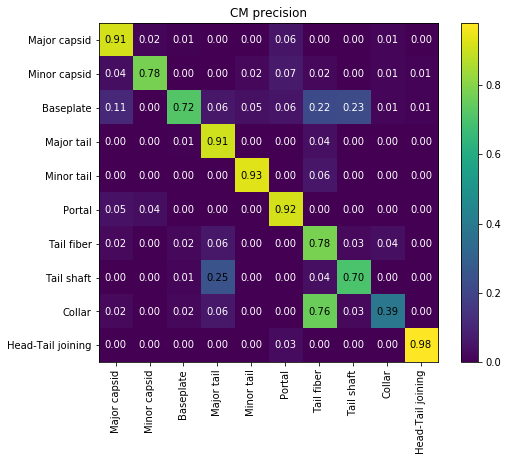

In [25]:
CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w2)[:,None]
CM_n=CM_n.T
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM precision')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")